In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt 
from functions import clean_and_combine, get_vix_data, get_interest_data, get_cpi_inflation_data, calculate_investment_evolution # Importar funciones

# Cargar los archivos CSV que contienen los datos de oro, bitcoin y S&P 500
# Los archivos son fuentes de datos históricos que se analizarán y combinarán en un único dataframe
df_gold = pd.read_csv(r'C:\Users\usr\Documents\GitHub\data-wrangling-project\df_gold.csv')
df_bitcoin = pd.read_csv(r'C:\Users\usr\Documents\GitHub\data-wrangling-project\df_bitcoin.csv')
df_sp500 = pd.read_csv(r'C:\Users\usr\Documents\GitHub\data-wrangling-project\df_sp500.csv')

# Obtener los datos externos desde fuentes API o servicios como Yahoo Finance
# 1. Datos del VIX (índice del miedo, volatilidad implícita)
df_vix = get_vix_data()

# 2. Datos de la tasa de interés de la Reserva Federal
df_interest = get_interest_data()

# 3. Datos del Índice de Precios al Consumidor (CPI) e inflación
df_cpi_inflation = get_cpi_inflation_data()

# Combinar y limpiar todos los datasets: oro, bitcoin, S&P 500, VIX, tasa de interés y CPI/inflación
# Esta función combina todos los dataframes, estandariza las fechas y ajusta los valores para que puedan ser comparados
df_combined = clean_and_combine(df_gold, df_bitcoin, df_sp500, df_vix, df_interest, df_cpi_inflation)

# Calcular la evolución de la inversión, sumando $100 mensuales en Bitcoin, Oro y S&P 500
# Esta función calcula el rendimiento de la inversión y lo añade directamente a 'df_combined'
df_combined = calculate_investment_evolution(df_combined)

# Mostrar el dataframe combinado en Jupyter Notebook
df_combined

c:\Users\usr\Documents\GitHub\data-wrangling-project\functions.py:57: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df_cpi.resample('A').last()  # Obtener el último valor de cada año
c:\Users\usr\Documents\GitHub\data-wrangling-project\functions.py:66: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily_cpi = df_daily_cpi.fillna(method='ffill').fillna(method='bfill').round(2)
c:\Users\usr\Documents\GitHub\data-wrangling-project\functions.py:92: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp500['price_sp500'] = pd.to_numeric(df_sp500['price_sp500'].str.replace(',', ''), errors='coerce').fillna(method='ffill').round(0).astype(int)
c:\Users\usr\Documents\GitHub\data-wrangling-project\functions.py:117: FutureWarning: 'M' is deprecated and

,date,price_bitcoin,price_gold,price_sp500,change_bitcoin,change_gold,vix,interest_rate,cpi,inflation,investment_bitcoin,investment_gold,investment_sp500
0,2015-01-02,315,1186,2058,0.10,0.18,17.79,0.01,234.82,0.76,100.00000,100.000000,100.000000
1,2015-01-05,275,1204,2021,3.82,1.50,19.92,0.00,234.84,0.76,100.00000,100.000000,100.000000
2,2015-01-06,282,1219,2003,2.70,1.28,21.12,0.02,234.84,0.76,100.00000,100.000000,100.000000
3,2015-01-07,291,1211,2026,3.21,-0.71,19.31,0.02,234.84,0.76,100.00000,100.000000,100.000000
4,2015-01-08,283,1208,2062,-2.97,-0.18,17.01,0.02,234.85,0.76,100.00000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,2024-02-05,42697,2043,4943,0.27,-0.53,13.67,5.23,307.54,3.35,370584.28199,15246.307244,18928.875797
2289,2024-02-06,43088,2051,4954,0.91,0.42,13.06,5.22,307.56,3.35,370584.28199,15246.307244,18928.875797
2290,2024-02-07,44340,2052,4995,2.91,0.01,12.83,5.22,307.58,3.35,370584.28199,15246.307244,18928.875797
2291,2024-02-08,45293,2048,4998,2.15,-0.19,12.79,5.22,307.60,3.35,370584.28199,15246.307244,18928.875797


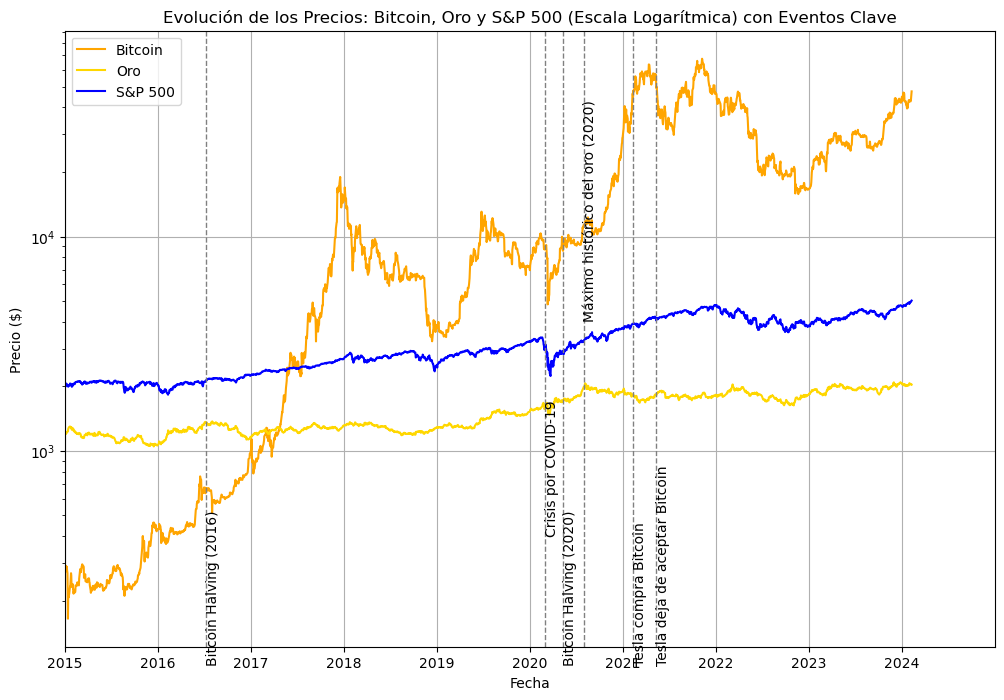

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear el gráfico con escala logarítmica y añadir anotaciones dentro del rango 2015-2024

plt.figure(figsize=(12, 8))

# Trazar las líneas de los precios
plt.plot(df_combined['date'], df_combined['price_bitcoin'], label='Bitcoin', color='orange')
plt.plot(df_combined['date'], df_combined['price_gold'], label='Oro', color='gold')
plt.plot(df_combined['date'], df_combined['price_sp500'], label='S&P 500', color='blue')

# Añadir escala logarítmica en el eje Y
plt.yscale('log')

# Eventos importantes de Bitcoin
plt.axvline(pd.Timestamp('2016-07-09'), color='gray', linestyle='--', linewidth=1)
plt.text(pd.Timestamp('2016-07-09'), 100, 'Bitcoin Halving (2016)', rotation=90, verticalalignment='bottom')

plt.axvline(pd.Timestamp('2020-05-11'), color='gray', linestyle='--', linewidth=1)
plt.text(pd.Timestamp('2020-05-11'), 100, 'Bitcoin Halving (2020)', rotation=90, verticalalignment='bottom')

plt.axvline(pd.Timestamp('2021-02-08'), color='gray', linestyle='--', linewidth=1)
plt.text(pd.Timestamp('2021-02-08'), 100, 'Tesla compra Bitcoin', rotation=90, verticalalignment='bottom')

plt.axvline(pd.Timestamp('2021-05-12'), color='gray', linestyle='--', linewidth=1)
plt.text(pd.Timestamp('2021-05-12'), 100, 'Tesla deja de aceptar Bitcoin', rotation=90, verticalalignment='bottom')

# Eventos importantes del oro
plt.axvline(pd.Timestamp('2020-08-01'), color='gray', linestyle='--', linewidth=1)
plt.text(pd.Timestamp('2020-08-01'), 4000, 'Máximo histórico del oro (2020)', rotation=90, verticalalignment='bottom')

# Eventos importantes del S&P 500
plt.axvline(pd.Timestamp('2020-03-01'), color='gray', linestyle='--', linewidth=1)
plt.text(pd.Timestamp('2020-03-01'), 400, 'Crisis por COVID-19', rotation=90, verticalalignment='bottom')

# Títulos y etiquetas
plt.title('Evolución de los Precios: Bitcoin, Oro y S&P 500 (Escala Logarítmica) con Eventos Clave')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2024-12-31'))  # Limitar el eje X entre 2015 y 2024
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

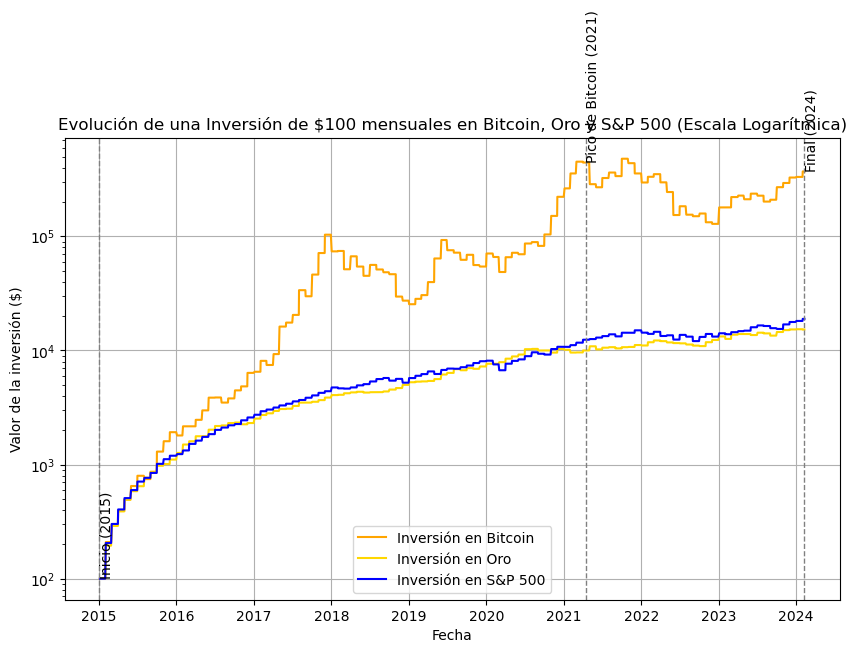

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Función para obtener el valor de la inversión en las fechas clave más cercanas
def get_closest_investment_value(df, target_date):
    closest_row = df.iloc[(df['date'] - target_date).abs().argmin()]
    investment_bitcoin = closest_row['investment_bitcoin']
    investment_gold = closest_row['investment_gold']
    investment_sp500 = closest_row['investment_sp500']
    actual_date = closest_row['date']
    return investment_bitcoin, investment_gold, investment_sp500, actual_date

# Fechas clave
start_date = pd.Timestamp('2015-01-01')
bitcoin_peak_date = pd.Timestamp('2021-04-14')  # Pico de Bitcoin en abril de 2021
end_date = pd.Timestamp('2024-02-09')  # Fecha final en el DataFrame

# Obtener los valores de inversión más cercanos a las fechas clave
investment_start = get_closest_investment_value(df_combined, start_date)
investment_bitcoin_peak = get_closest_investment_value(df_combined, bitcoin_peak_date)
investment_end = get_closest_investment_value(df_combined, end_date)

# Crear gráfico con escala logarítmica para la inversión en Bitcoin, Oro y S&P 500
plt.figure(figsize=(10, 6))

# Graficar las líneas de inversión
plt.plot(df_combined['date'], df_combined['investment_bitcoin'], label='Inversión en Bitcoin', color='orange')
plt.plot(df_combined['date'], df_combined['investment_gold'], label='Inversión en Oro', color='gold')
plt.plot(df_combined['date'], df_combined['investment_sp500'], label='Inversión en S&P 500', color='blue')

# Añadir escala logarítmica en el eje Y
plt.yscale('log')

# Añadir anotaciones de fechas clave
plt.axvline(start_date, color='gray', linestyle='--', linewidth=1)
plt.text(start_date, investment_start[0], 'Inicio (2015)', rotation=90, verticalalignment='bottom')

plt.axvline(bitcoin_peak_date, color='gray', linestyle='--', linewidth=1)
plt.text(bitcoin_peak_date, investment_bitcoin_peak[0], 'Pico de Bitcoin (2021)', rotation=90, verticalalignment='bottom')

plt.axvline(end_date, color='gray', linestyle='--', linewidth=1)
plt.text(end_date, investment_end[0], 'Final (2024)', rotation=90, verticalalignment='bottom')

# Títulos y etiquetas
plt.title('Evolución de una Inversión de $100 mensuales en Bitcoin, Oro y S&P 500 (Escala Logarítmica)')
plt.xlabel('Fecha')
plt.ylabel('Valor de la inversión ($)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [41]:
import numpy as np

# Definir las fechas clave
start_date = pd.Timestamp('2015-01-05')
end_date = pd.Timestamp('2024-02-09')

# Función para calcular el CAGR
def calculate_cagr(initial_value, final_value, years):
    return (final_value / initial_value) ** (1 / years) - 1

# Función para obtener el valor de la inversión en las fechas clave más cercanas
def get_closest_investment_value(df, target_date):
    closest_row = df.iloc[(df['date'] - target_date).abs().argmin()]
    investment_bitcoin = closest_row['investment_bitcoin']
    investment_gold = closest_row['investment_gold']
    investment_sp500 = closest_row['investment_sp500']
    actual_date = closest_row['date']
    return investment_bitcoin, investment_gold, investment_sp500, actual_date

# Cargar el DataFrame y convertir fechas
df_combined['date'] = pd.to_datetime(df_combined['date'])

# Obtener los valores iniciales y finales
investment_start = get_closest_investment_value(df_combined, start_date)
investment_end = get_closest_investment_value(df_combined, end_date)

# Calcular el número de años en el período
years = (investment_end[3] - investment_start[3]).days / 365.25

# Calcular el CAGR para Bitcoin, Oro y S&P 500
cagr_bitcoin = calculate_cagr(investment_start[0], investment_end[0], years)
cagr_gold = calculate_cagr(investment_start[1], investment_end[1], years)
cagr_sp500 = calculate_cagr(investment_start[2], investment_end[2], years)

# Calcular la volatilidad anualizada
volatility_bitcoin = df_combined['bitcoin_return'].std() * np.sqrt(252)
volatility_gold = df_combined['gold_return'].std() * np.sqrt(252)
volatility_sp500 = df_combined['sp500_return'].std() * np.sqrt(252)

# Mostrar los resultados
print(f"CAGR Bitcoin: {cagr_bitcoin * 100:.2f}%")
print(f"CAGR Oro: {cagr_gold * 100:.2f}%")
print(f"CAGR S&P 500: {cagr_sp500 * 100:.2f}%")
print(f"Volatilidad Bitcoin: {volatility_bitcoin:.2f}%")
print(f"Volatilidad Oro: {volatility_gold:.2f}%")
print(f"Volatilidad S&P 500: {volatility_sp500:.2f}%")


CAGR Bitcoin: 146.83%
CAGR Oro: 73.79%
CAGR S&P 500: 77.98%
Volatilidad Bitcoin: 70.37%
Volatilidad Oro: 14.71%
Volatilidad S&P 500: 18.19%


C:\Users\usr\AppData\Local\Temp\ipykernel_7716\1355070428.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['date'] = pd.to_datetime(df_combined['date'])


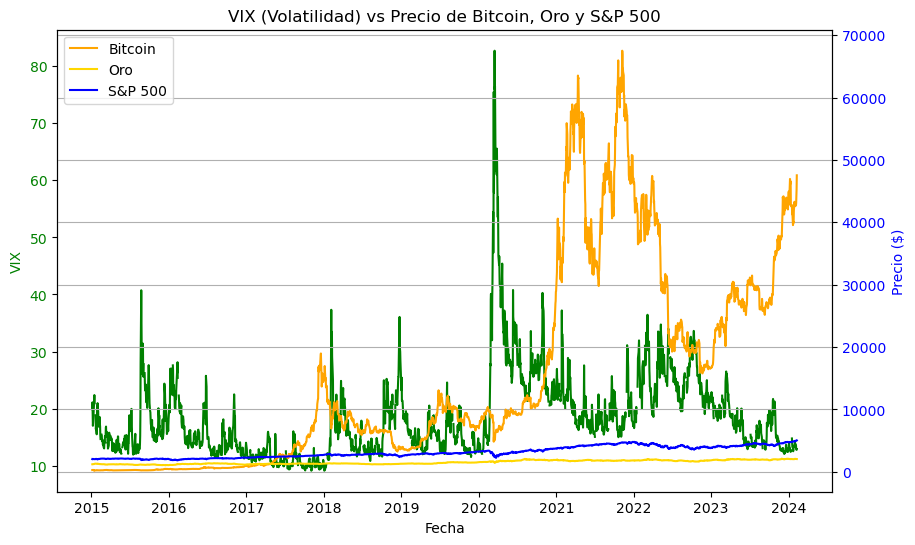

In [43]:
import matplotlib.pyplot as plt

# Crear gráfico mejorado con VIX, Bitcoin, Oro y S&P 500
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Graficar VIX
ax1.plot(df_combined['date'], df_combined['vix'], color='green', label='VIX')

# Graficar Bitcoin y Oro
ax2.plot(df_combined['date'], df_combined['price_bitcoin'], color='orange', label='Bitcoin')
ax2.plot(df_combined['date'], df_combined['price_gold'], color='gold', label='Oro')

# Añadir S&P 500
ax2.plot(df_combined['date'], df_combined['price_sp500'], color='blue', label='S&P 500')

# Añadir etiquetas y leyendas
ax1.set_xlabel('Fecha')
ax1.set_ylabel('VIX', color='green')
ax2.set_ylabel('Precio ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='green')
ax2.tick_params(axis='y', labelcolor='blue')

# Añadir título y leyenda
plt.title('VIX (Volatilidad) vs Precio de Bitcoin, Oro y S&P 500')
ax2.legend(loc='upper left')

# Mostrar gráfico
plt.grid(True)
plt.show()


In [44]:
# Encontrar los picos más altos del VIX para analizarlos
vix_peak_dates = df_combined.nlargest(3, 'vix')['date'].values  # Obtener las 3 fechas de picos más altos del VIX

# Función para calcular los cambios porcentuales en los precios antes y después del evento
def calculate_percentage_change(df, event_date, column, window_days=30):
    # Filtrar los datos dentro de la ventana antes y después del evento
    before_event = df[(df['date'] >= event_date - pd.Timedelta(days=window_days)) & (df['date'] < event_date)]
    after_event = df[(df['date'] > event_date) & (df['date'] <= event_date + pd.Timedelta(days=window_days))]
    
    # Obtener el valor antes y después del evento
    value_before = before_event[column].iloc[-1] if not before_event.empty else None
    value_after = after_event[column].iloc[0] if not after_event.empty else None
    
    if value_before is not None and value_after is not None:
        # Calcular el cambio porcentual
        change_percentage = ((value_after - value_before) / value_before) * 100
        return change_percentage, value_before, value_after
    return None, None, None

# Calcular los cambios porcentuales en los precios de Bitcoin, Oro y S&P 500 durante los picos de VIX
price_changes = {}
for event_date in vix_peak_dates:
    price_changes[str(event_date)] = {
        'Bitcoin': calculate_percentage_change(df_combined, pd.Timestamp(event_date), 'price_bitcoin'),
        'Oro': calculate_percentage_change(df_combined, pd.Timestamp(event_date), 'price_gold'),
        'S&P 500': calculate_percentage_change(df_combined, pd.Timestamp(event_date), 'price_sp500')
    }

# Mostrar los resultados
print(price_changes)


{'2020-03-16T00:00:00.000000000': {'Bitcoin': (-5.784383954154728, 5584, 5261), 'Oro': (0.5932762030323006, 1517, 1526), 'S&P 500': (-6.713389893028403, 2711, 2529)}, '2020-03-18T00:00:00.000000000': {'Bitcoin': (17.316099600836342, 5261, 6172), 'Oro': (-3.079947575360419, 1526, 1479), 'S&P 500': (-4.744958481613286, 2529, 2409)}, '2020-03-17T00:00:00.000000000': {'Bitcoin': (6.580516898608351, 5030, 5361), 'Oro': (-0.5383580080753702, 1486, 1478), 'S&P 500': (0.5029337803855826, 2386, 2398)}}


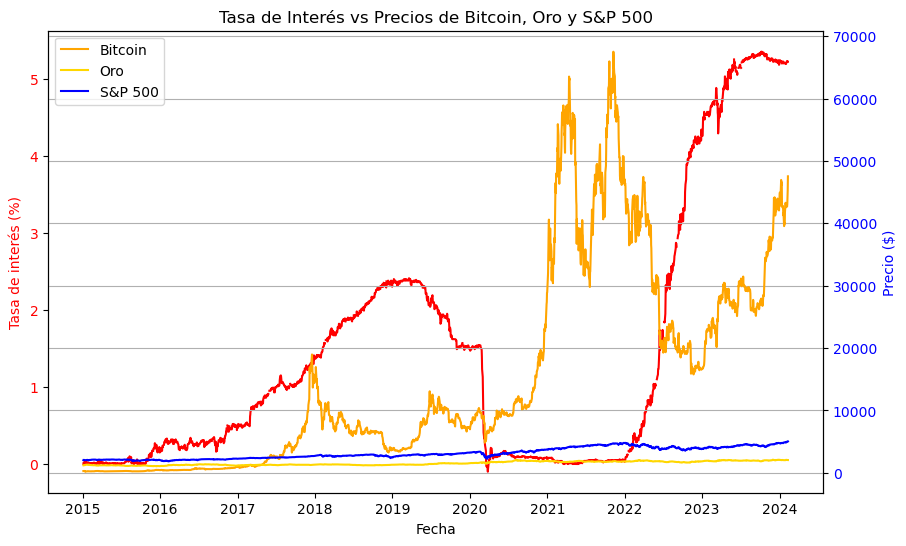

In [45]:
import matplotlib.pyplot as plt

# Crear gráfico que muestra la tasa de interés, Bitcoin, Oro y S&P 500
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Graficar tasa de interés en el eje izquierdo
ax1.plot(df_combined['date'], df_combined['interest_rate'], color='red', label='Tasa de interés')

# Graficar Bitcoin, Oro y S&P 500 en el eje derecho
ax2.plot(df_combined['date'], df_combined['price_bitcoin'], color='orange', label='Bitcoin')
ax2.plot(df_combined['date'], df_combined['price_gold'], color='gold', label='Oro')
ax2.plot(df_combined['date'], df_combined['price_sp500'], color='blue', label='S&P 500')

# Añadir etiquetas y leyendas
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Tasa de interés (%)', color='red')
ax2.set_ylabel('Precio ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='y', labelcolor='blue')

# Añadir título y leyenda
plt.title('Tasa de Interés vs Precios de Bitcoin, Oro y S&P 500')
ax2.legend(loc='upper left')

# Añadir grid
plt.grid(True)

# Mostrar gráfico
plt.show()


In [47]:
import pandas as pd

# Definir las fechas clave de los eventos
covid_crash_date = pd.Timestamp('2020-03-23')  # Mínimo durante la crisis del COVID-19
post_covid_peak_date = pd.Timestamp('2021-11-10')  # Pico de Bitcoin en 2021
rate_hike_start_date = pd.Timestamp('2022-01-01')  # Inicio del aumento de las tasas en 2022

# Función para encontrar las fechas más cercanas a los eventos clave
def get_closest_value(df, target_date, column):
    closest_row = df.iloc[(df['date'] - target_date).abs().argmin()]
    return closest_row[column], closest_row['date']

# Calcular los cambios porcentuales durante los eventos clave
def calculate_percentage_change_closest(df, start_date, end_date, column):
    before_event, actual_start_date = get_closest_value(df, start_date, column)
    after_event, actual_end_date = get_closest_value(df, end_date, column)
    change_percentage = ((after_event - before_event) / before_event) * 100
    return change_percentage, before_event, after_event, actual_start_date, actual_end_date

# Calcular los cambios porcentuales durante los eventos clave de COVID-19 y el aumento de tasas
price_changes_covid = {
    'Bitcoin': calculate_percentage_change_closest(df_combined, covid_crash_date, post_covid_peak_date, 'price_bitcoin'),
    'Oro': calculate_percentage_change_closest(df_combined, covid_crash_date, post_covid_peak_date, 'price_gold'),
    'S&P 500': calculate_percentage_change_closest(df_combined, covid_crash_date, post_covid_peak_date, 'price_sp500')
}

price_changes_rate_hike = {
    'Bitcoin': calculate_percentage_change_closest(df_combined, post_covid_peak_date, rate_hike_start_date, 'price_bitcoin'),
    'Oro': calculate_percentage_change_closest(df_combined, post_covid_peak_date, rate_hike_start_date, 'price_gold'),
    'S&P 500': calculate_percentage_change_closest(df_combined, post_covid_peak_date, rate_hike_start_date, 'price_sp500')
}

# Mostrar los resultados
print(price_changes_covid)
print(price_changes_rate_hike)



{'Bitcoin': (903.7563765651569, 6469, 64933, Timestamp('2020-03-23 00:00:00'), Timestamp('2021-11-10 00:00:00')), 'Oro': (17.857142857142858, 1568, 1848, Timestamp('2020-03-23 00:00:00'), Timestamp('2021-11-10 00:00:00')), 'S&P 500': (107.73357174787661, 2237, 4647, Timestamp('2020-03-23 00:00:00'), Timestamp('2021-11-10 00:00:00'))}
{'Bitcoin': (-28.81893644217886, 64933, 46220, Timestamp('2021-11-10 00:00:00'), Timestamp('2021-12-31 00:00:00')), 'Oro': (-1.0281385281385282, 1848, 1829, Timestamp('2021-11-10 00:00:00'), Timestamp('2021-12-31 00:00:00')), 'S&P 500': (2.560791908758339, 4647, 4766, Timestamp('2021-11-10 00:00:00'), Timestamp('2021-12-31 00:00:00'))}


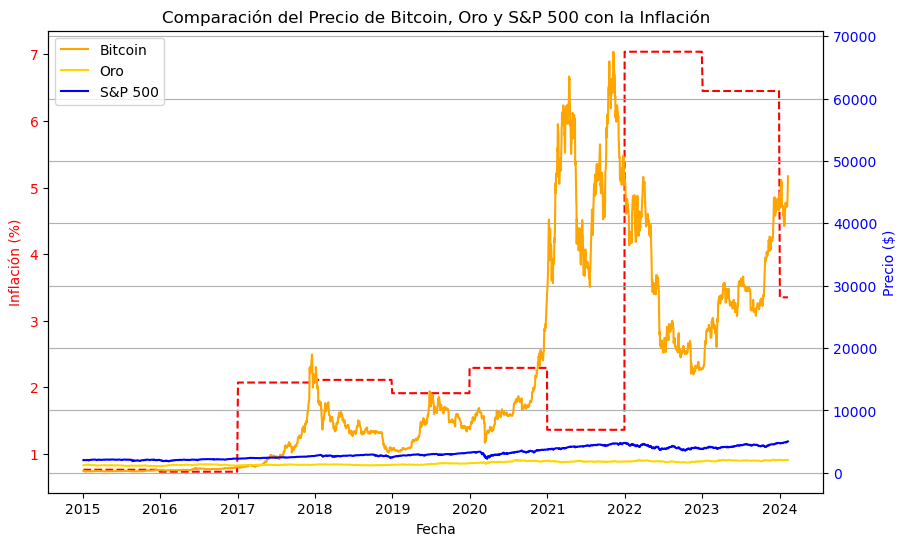

In [48]:
import matplotlib.pyplot as plt

# Crear gráfico mejorado que compara la inflación con los precios de Bitcoin, Oro y S&P 500
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Graficar inflación en el eje izquierdo
ax1.plot(df_combined['date'], df_combined['inflation'], color='red', linestyle='--', label='Inflación')

# Graficar Bitcoin, Oro y S&P 500 en el eje derecho
ax2.plot(df_combined['date'], df_combined['price_bitcoin'], color='orange', label='Bitcoin')
ax2.plot(df_combined['date'], df_combined['price_gold'], color='gold', label='Oro')
ax2.plot(df_combined['date'], df_combined['price_sp500'], color='blue', label='S&P 500')

# Añadir etiquetas y leyendas
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Inflación (%)', color='red')
ax2.set_ylabel('Precio ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='y', labelcolor='blue')

# Añadir título y leyenda
plt.title('Comparación del Precio de Bitcoin, Oro y S&P 500 con la Inflación')
ax2.legend(loc='upper left')

# Añadir grid
plt.grid(True)

# Mostrar gráfico
plt.show()


In [49]:
# Definir las fechas clave relacionadas con picos de inflación
inflation_peak_2021_start = pd.Timestamp('2021-01-01')  # Inicio del aumento fuerte de la inflación en 2021
inflation_peak_2021_end = pd.Timestamp('2022-01-01')    # Inflación sigue alta hacia principios de 2022

# Función para calcular los cambios porcentuales en los precios antes y después del evento
def calculate_percentage_change_period(df, start_date, end_date, column):
    before_event, actual_start_date = get_closest_value(df, start_date, column)
    after_event, actual_end_date = get_closest_value(df, end_date, column)
    change_percentage = ((after_event - before_event) / before_event) * 100
    return change_percentage, before_event, after_event, actual_start_date, actual_end_date

# Calcular los cambios porcentuales para Bitcoin, Oro y S&P 500 durante el periodo de inflación alta (2021-2022)
price_changes_inflation_2021 = {
    'Bitcoin': calculate_percentage_change_period(df_combined, inflation_peak_2021_start, inflation_peak_2021_end, 'price_bitcoin'),
    'Oro': calculate_percentage_change_period(df_combined, inflation_peak_2021_start, inflation_peak_2021_end, 'price_gold'),
    'S&P 500': calculate_percentage_change_period(df_combined, inflation_peak_2021_start, inflation_peak_2021_end, 'price_sp500')
}

# Mostrar los resultados
print(price_changes_inflation_2021)


{'Bitcoin': (59.66009188573008, 28949, 46220, Timestamp('2020-12-31 00:00:00'), Timestamp('2021-12-31 00:00:00')), 'Oro': (-3.4828496042216357, 1895, 1829, Timestamp('2020-12-31 00:00:00'), Timestamp('2021-12-31 00:00:00')), 'S&P 500': (26.89030883919063, 3756, 4766, Timestamp('2020-12-31 00:00:00'), Timestamp('2021-12-31 00:00:00'))}


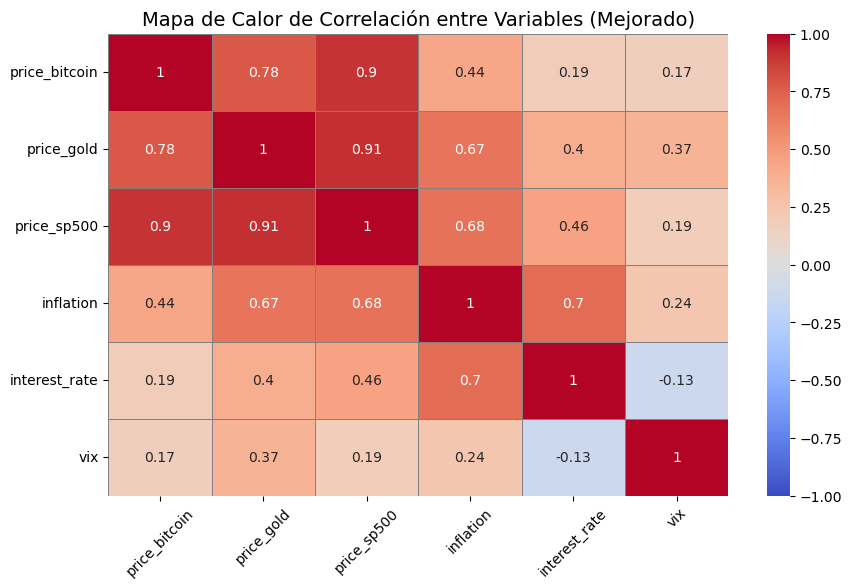

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva figura para el mapa de calor mejorado
plt.figure(figsize=(10, 6))

# Reordenar las columnas para una visualización más lógica
ordered_columns = ['price_bitcoin', 'price_gold', 'price_sp500', 'inflation', 'interest_rate', 'vix']
corr_matrix_ordered = df_combined[ordered_columns].corr()

# Crear el mapa de calor mejorado con anotaciones más claras
sns.heatmap(corr_matrix_ordered, annot=True, cmap="coolwarm", vmin=-1, vmax=1, annot_kws={"size": 10}, linewidths=0.5, linecolor='gray')

# Añadir título y ajustar etiquetas
plt.title('Mapa de Calor de Correlación entre Variables (Mejorado)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar el gráfico
plt.show()


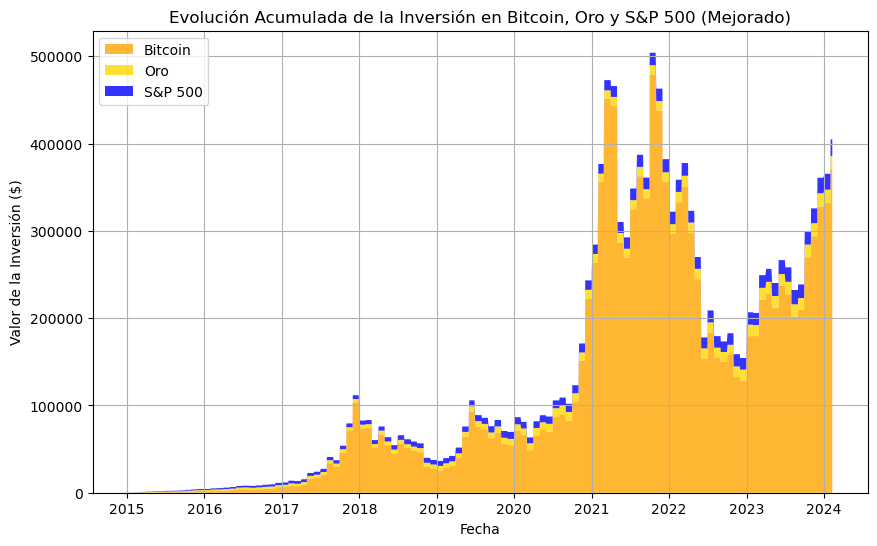

In [52]:
import matplotlib.pyplot as plt

# Crear gráfico de área apilada mejorado con transparencia y anotaciones clave
plt.figure(figsize=(10, 6))

# Añadir transparencia a las áreas para que se puedan ver mejor las contribuciones
plt.stackplot(df_combined['date'], 
              df_combined['investment_bitcoin'], 
              df_combined['investment_gold'], 
              df_combined['investment_sp500'], 
              labels=['Bitcoin', 'Oro', 'S&P 500'], 
              colors=['orange', 'gold', 'blue'], alpha=0.8)

# Añadir títulos y etiquetas
plt.title('Evolución Acumulada de la Inversión en Bitcoin, Oro y S&P 500 (Mejorado)')
plt.xlabel('Fecha')
plt.ylabel('Valor de la Inversión ($)')

# Añadir leyenda
plt.legend(loc='upper left')

# Añadir grid
plt.grid(True)

# Mostrar gráfico
plt.show()


In [51]:
# Definir fechas clave para el análisis
bitcoin_peak_date = pd.Timestamp('2021-11-10')  # Pico de Bitcoin en 2021
bitcoin_drop_date = pd.Timestamp('2022-06-18')  # Caída importante en 2022

# Calcular el valor total de la cartera en esos momentos clave
def calculate_portfolio_composition(df, date):
    # Filtrar la fila más cercana a la fecha proporcionada
    closest_row = df.iloc[(df['date'] - date).abs().argmin()]
    total_investment = (closest_row['investment_bitcoin'] +
                        closest_row['investment_gold'] +
                        closest_row['investment_sp500'])
    
    # Calcular la proporción de cada activo
    bitcoin_percentage = (closest_row['investment_bitcoin'] / total_investment) * 100
    gold_percentage = (closest_row['investment_gold'] / total_investment) * 100
    sp500_percentage = (closest_row['investment_sp500'] / total_investment) * 100
    
    return {
        'Bitcoin': bitcoin_percentage,
        'Oro': gold_percentage,
        'S&P 500': sp500_percentage,
        'Total ($)': total_investment
    }

# Calcular las proporciones de la cartera en el pico de Bitcoin y la caída en 2022
composition_at_peak = calculate_portfolio_composition(df_combined, bitcoin_peak_date)
composition_at_drop = calculate_portfolio_composition(df_combined, bitcoin_drop_date)

# Mostrar los resultados
print(composition_at_peak)
print(composition_at_drop)


{'Bitcoin': 94.5914062082701, 'Oro': 2.3204406213157887, 'S&P 500': 3.0881531704141008, 'Total ($)': 462886.8344122718}
{'Bitcoin': 86.46619639960214, 'Oro': 6.526475920220866, 'S&P 500': 7.007327680176988, 'Total ($)': 177856.00963218856}


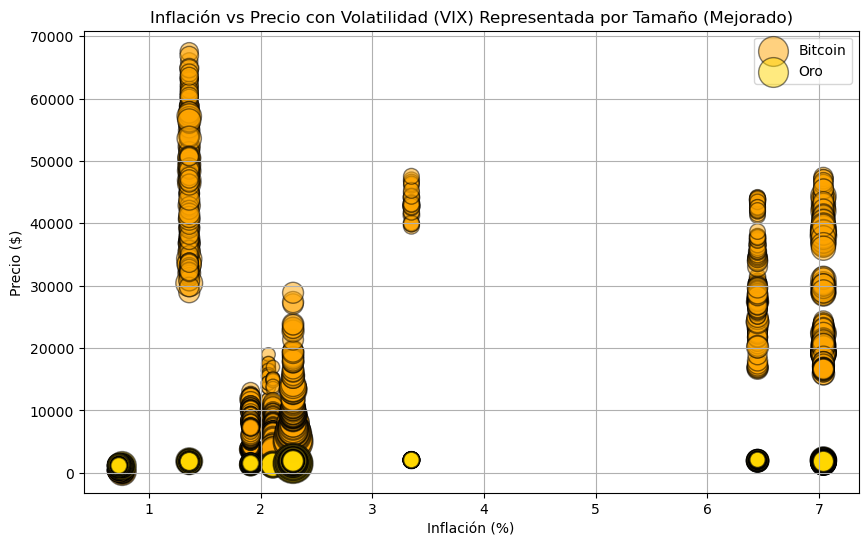

In [53]:
import matplotlib.pyplot as plt

# Crear gráfico de dispersión con burbujas mejorado (diferenciar más claramente Bitcoin y oro, ajustar tamaño)
plt.figure(figsize=(10, 6))

# Graficar Bitcoin
plt.scatter(df_combined['inflation'], df_combined['price_bitcoin'], 
            s=df_combined['vix']*10, c='orange', alpha=0.5, label='Bitcoin', edgecolor='black', linewidth=1)

# Graficar Oro
plt.scatter(df_combined['inflation'], df_combined['price_gold'], 
            s=df_combined['vix']*10, c='gold', alpha=0.5, label='Oro', edgecolor='black', linewidth=1)

# Añadir títulos y etiquetas
plt.title('Inflación vs Precio con Volatilidad (VIX) Representada por Tamaño (Mejorado)')
plt.xlabel('Inflación (%)')
plt.ylabel('Precio ($)')
plt.legend(loc='upper right')

# Añadir grid
plt.grid(True)

# Mostrar gráfico
plt.show()


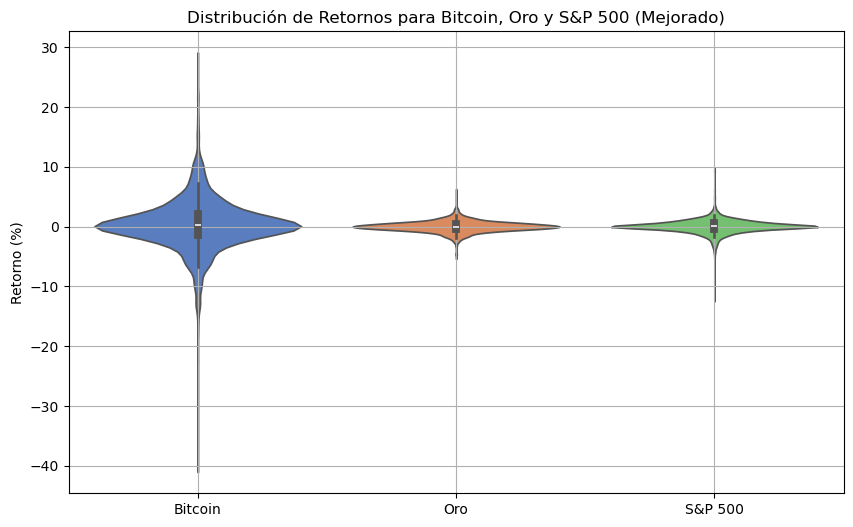

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráfico de violín mejorado con colores diferenciados y una visualización más clara
plt.figure(figsize=(10, 6))

# Crear el gráfico de violín
sns.violinplot(data=df_combined[['bitcoin_return', 'gold_return', 'sp500_return']], palette='muted')

# Añadir título y etiquetas
plt.title('Distribución de Retornos para Bitcoin, Oro y S&P 500 (Mejorado)')
plt.ylabel('Retorno (%)')
plt.xticks([0, 1, 2], ['Bitcoin', 'Oro', 'S&P 500'])

# Añadir líneas para la mediana y rango intercuartil
plt.grid(True)

# Mostrar gráfico
plt.show()


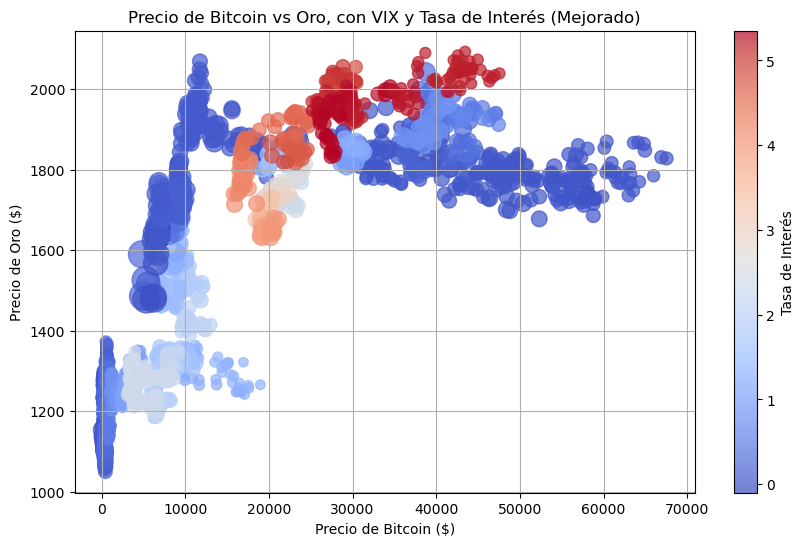

In [56]:
import matplotlib.pyplot as plt

# Crear gráfico de burbuja mejorado ajustando los colores y tamaños para una mejor visualización
plt.figure(figsize=(10, 6))

# Graficar con mejor ajuste de colores y tamaños de burbujas
scatter = plt.scatter(df_combined['price_bitcoin'], df_combined['price_gold'], 
                      s=df_combined['vix']*5, 
                      c=df_combined['interest_rate'], cmap='coolwarm', alpha=0.7)

# Añadir la barra de color para las tasas de interés
cbar = plt.colorbar(scatter)
cbar.set_label('Tasa de Interés')

# Añadir título y etiquetas
plt.title('Precio de Bitcoin vs Oro, con VIX y Tasa de Interés (Mejorado)')
plt.xlabel('Precio de Bitcoin ($)')
plt.ylabel('Precio de Oro ($)')
plt.grid(True)

# Mostrar el gráfico mejorado
plt.show()


In [57]:
# Definir umbrales clave para tasas de interés altas (>4%) y VIX alto (>30)
interest_rate_threshold = 4  # Tasa de interés alta (>4%)
vix_threshold = 30  # VIX alto (>30)

# Filtrar datos con altas tasas de interés y alta volatilidad (VIX alto)
high_interest_data = df_combined[df_combined['interest_rate'] > interest_rate_threshold]
high_vix_data = df_combined[df_combined['vix'] > vix_threshold]

# Calcular medias de precios de Bitcoin y Oro en momentos de altas tasas de interés y alta volatilidad
bitcoin_mean_price_high_interest = high_interest_data['price_bitcoin'].mean()
gold_mean_price_high_interest = high_interest_data['price_gold'].mean()

bitcoin_mean_price_high_vix = high_vix_data['price_bitcoin'].mean()
gold_mean_price_high_vix = high_vix_data['price_gold'].mean()

# Mostrar los resultados
{
    'Bitcoin (Tasa de interés > 4%)': bitcoin_mean_price_high_interest,
    'Oro (Tasa de interés > 4%)': gold_mean_price_high_interest,
    'Bitcoin (VIX > 30)': bitcoin_mean_price_high_vix,
    'Oro (VIX > 30)': gold_mean_price_high_vix
}


{'Bitcoin (Tasa de interés > 4%)': 28635.332258064514,
 'Oro (Tasa de interés > 4%)': 1939.2129032258065,
 'Bitcoin (VIX > 30)': 16647.90070921986,
 'Oro (VIX > 30)': 1719.7943262411347}